<a href="https://colab.research.google.com/github/19521242bao/CS116/blob/main/FinalProject/CS116_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <a href="https://www.uit.edu.vn/" title="Trường Đại học Công nghệ Thông tin" style="border: none;">
    <img src="https://i.imgur.com/WmMnSRt.png" alt="Trường Đại học Công nghệ Thông tin | University of Information Technology">
  </a>
</p>

<h3 align="center"><b>CS116.M12.KHCL - Machine Learning with Python</b></h3>
<h2 align="center"><b>ĐỒ ÁN CUỐI KỲ</b></h2>
<h1 align="center"><b>SUPPORT VECTOR MACHINE</b></h1>

**Dataset: Stroke Prediction**

**Sinh viên thực hiện:** 

<ul>
  <li>Lương Phạm Bảo - 19521242</li>
  <li>Nguyễn Gia Thống - 19520993</li>
  <li>Phạm Ngọc Dương - 19521412</li>
</ul>

# Chuẩn bị dữ liệu và các thư viện cần thiết


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS116

/content/drive/MyDrive/CS116


## Các thư viện xử lý

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time

#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
!pip install pywaffle
from pywaffle import Waffle

%matplotlib inline
init_notebook_mode(connected= True)




#Common model helpers
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)


# dimensionality reduction
from sklearn.decomposition import PCA

import pylab as pl

# imbalance dataset handling


from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)




# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
%cd /content/

/content


In [ ]:
visualize=pd.read_csv("SVM_results_CS116.csv")

In [ ]:
models=list(visualize["Model"])
ACC_score_17=list(visualize["K=17_ACC"])
F1_score_17=list(visualize["K=17_F1"])
ACC_score_15=list(visualize["K=15_ACC"])
F1_score_15=list(visualize["K=15_F1"])

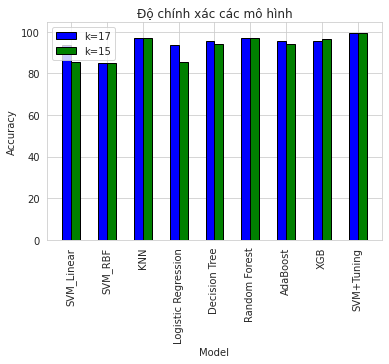

In [ ]:
n=len(models )
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, ACC_score_17, color = 'b',
        width = width, edgecolor = 'black',
        label='k=17')
plt.bar(r + width, ACC_score_15, color = 'g',
        width = width, edgecolor = 'black',
        label='k=15')
  
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("AccuracyAccuracy các mô hình")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,models,rotation ='vertical')
plt.legend()
  
plt.show()

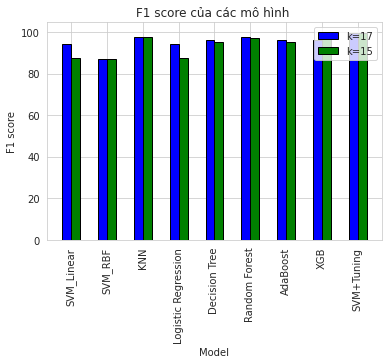

In [ ]:
n=len(models )
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, F1_score_17, color = 'b',
        width = width, edgecolor = 'black',
        label='k=17')
plt.bar(r + width, F1_score_15, color = 'g',
        width = width, edgecolor = 'black',
        label='k=15')
  
plt.xlabel("Model")
plt.ylabel("F1 score")
plt.title("F1 score của các mô hình ")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,models,rotation ='vertical')
plt.legend()
  
plt.show()

In [ ]:
visualize[]

,Model,K=17_ACC,K=15_ACC,K=17_F1,K=15_F1
0,SVM_Linear,93.77,85.66,94.38,87.63
1,SVM_RBF,85.05,85.05,87.00,87.22
2,KNN,97.00,97.00,97.39,97.39
3,Logistic Regression,93.61,85.58,94.25,87.54
4,Decision Tree,95.47,94.37,95.97,95.01
5,Random Forest,97.01,97.27,97.33,96.96
6,AdaBoost,95.55,94.28,96.00,94.92
7,XGB,95.55,96.71,96.08,97.05
8,SVM+Tuning,99.43,99.51,99.49,99.56


In [ ]:
models = ['Logistic Regression',    'K-Nearest Neighbor',    'SVM',    'Kernel SVM',    'Naive Bayes',    'Decision Tree', 'Random Forest']
acc_list = [0.925,	0.95,	0.9125,	0.95,	0.825	,0.9125	,0.9125]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x= models, y= acc_list)

## Đọc dữ liệu

In [ ]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')# tên tập train
print(data.shape)
label=data['stroke']
data.drop(columns=['stroke'],inplace=True)
print(data.shape)
print(data.head(20))
#đọc dữ liệu test và train

(5110, 12)
(5110, 11)
       id  gender   age  ...  avg_glucose_level   bmi   smoking_status
0    9046    Male  67.0  ...             228.69  36.6  formerly smoked
1   51676  Female  61.0  ...             202.21   NaN     never smoked
2   31112    Male  80.0  ...             105.92  32.5     never smoked
3   60182  Female  49.0  ...             171.23  34.4           smokes
4    1665  Female  79.0  ...             174.12  24.0     never smoked
5   56669    Male  81.0  ...             186.21  29.0  formerly smoked
6   53882    Male  74.0  ...              70.09  27.4     never smoked
7   10434  Female  69.0  ...              94.39  22.8     never smoked
8   27419  Female  59.0  ...              76.15   NaN          Unknown
9   60491  Female  78.0  ...              58.57  24.2          Unknown
10  12109  Female  81.0  ...              80.43  29.7     never smoked
11  12095  Female  61.0  ...             120.46  36.8           smokes
12  12175  Female  54.0  ...             104.51  27.3  

**Dễ thấy cột id không ảnh hưởng đến kết quả bài toán nên ta sẽ bỏ cột này**

In [ ]:
data.drop(columns=['id'],inplace=True) 
data.shape


(5110, 10)

**Xem thông tin dữ liệu**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 399.3+ KB


In [ ]:
data.describe()#mô tả dữ liệu số

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [ ]:
data.describe(include=[np.object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Chuẩn hóa các dữ liệu 

## Hàm thống kê dữ liệu thiếu của mỗi loại feature

In [ ]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    print(total)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)
#

bmi                  201
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
dtype: int64


,Total,Percent
bmi,201,0.039335
smoking_status,0,0.000000
avg_glucose_level,0,0.000000
Residence_type,0,0.000000
work_type,0,0.000000
ever_married,0,0.000000
heart_disease,0,0.000000
hypertension,0,0.000000
age,0,0.000000
gender,0,0.000000


In [ ]:
# Hàm vẽ biểu đồ
def Bieu_do_thong_ke(data):
  # Tạo một bảng chứa các biểu đồ
  fig,axes = plt.subplots(2,4,figsize = (16,20))

  sns.set_style('whitegrid')
  fig.suptitle("Biểu đồ thống kê một số thuộc tính quan trọng")

  sns.countplot(ax=axes[0,0],data=data,x='heart_disease')
  sns.countplot(ax=axes[0,1],data=data,x='smoking_status')
  sns.distplot(a=data['age'], ax=axes[0,2],hist= True)
  sns.distplot(a=data['avg_glucose_level'], ax=axes[0,3],hist= True)
  sns.distplot(a=data['bmi'], ax=axes[1,0],hist= True)
  sns.distplot(a=data['hypertension'], ax=axes[1,1],hist= True)
  sns.countplot(ax=axes[1,2],data=data,x='gender')
  plt.show()

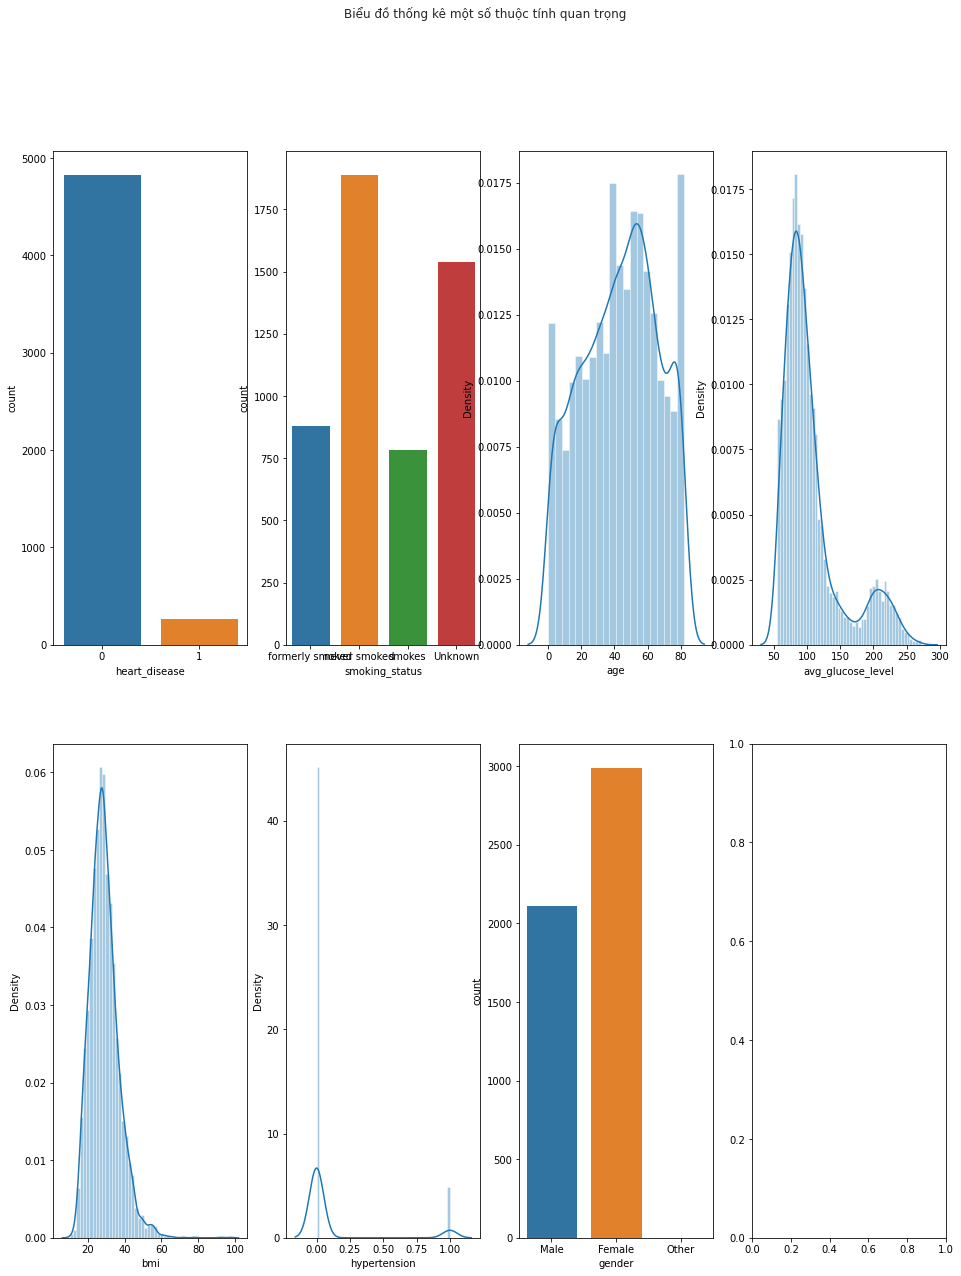

In [ ]:
Bieu_do_thong_ke(data)

## Điền các cột thiếu bằng mean các cột dó 

In [ ]:

data[['bmi']]=data[['bmi']].fillna(value=np.mean(data['bmi']))


In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked


In [ ]:
data[['age']]=data[['age']].fillna(value=np.mean(data['age']))

In [ ]:
data[['hypertension']]=data[['hypertension']].fillna(value=np.mean(data['hypertension']))

In [ ]:
#avg_glucose_level
data[['avg_glucose_level']]=data[['avg_glucose_level']].fillna(value=np.mean(data['avg_glucose_level']))

In [ ]:
data[['heart_disease']]=data[['heart_disease']].fillna(value=np.mean(data['heart_disease']))

In [ ]:
draw_missing_data_table(data)
#

smoking_status       0
bmi                  0
avg_glucose_level    0
Residence_type       0
work_type            0
ever_married         0
heart_disease        0
hypertension         0
age                  0
gender               0
dtype: int64


,Total,Percent
smoking_status,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
Residence_type,0,0.0
work_type,0,0.0
ever_married,0,0.0
heart_disease,0,0.0
hypertension,0,0.0
age,0,0.0
gender,0,0.0


In [ ]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown


In [ ]:
# Classifying data into numerical and categorical variables.
data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]

Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

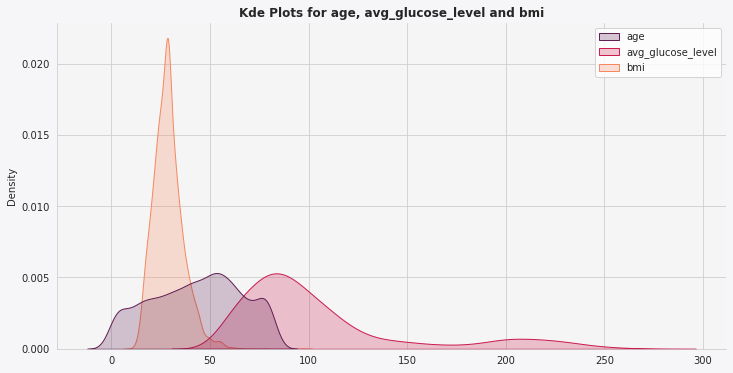

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

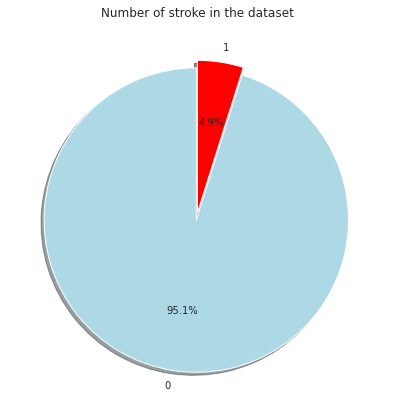

In [ ]:
labels =label.value_counts(sort = True).index
sizes = label.value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

**Nhận xét: Dữ liệu bị mất cân bằng nghiêm trọng**

# Xử lý dữ liệu về dạng các feature để đưa vào model

In [ ]:
import random

## Chuẩn hóa cho gender,residence_type,ever_married

In [ ]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else ( -0 if x=="Rural" else random.randint(0,1)))
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [ ]:
data['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [ ]:
data.head(10 )

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked
5,1,81.0,0,0,1,Private,1,186.21,29.000000,formerly smoked
6,1,74.0,1,1,1,Private,0,70.09,27.400000,never smoked
7,0,69.0,0,0,0,Private,1,94.39,22.800000,never smoked
8,0,59.0,0,0,1,Private,0,76.15,28.893237,Unknown
9,0,78.0,0,0,1,Private,1,58.57,24.200000,Unknown


## Chuẩn hóa smoking_status, work_type

In [ ]:
# One Hot encoding smoking_status, work_type
data_dummies = data[['smoking_status']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

In [ ]:
# #One Hot encoding smoking_status, work_type
data_dummies = data[['work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['work_type'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

In [ ]:
draw_missing_data_table(data)

work_type_children                0
bmi                               0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
smoking_status_Unknown            0
work_type_Self-employed           0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
gender                            0
dtype: int64


,Total,Percent
work_type_children,0,0.0
bmi,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
smoking_status_Unknown,0,0.0
work_type_Self-employed,0,0.0


# Huấn luyện 

In [ ]:
data.shape

(4500, 17)

In [ ]:
labels=pd.read_csv('healthcare-dataset-stroke-data.csv')['stroke']

In [ ]:
labels

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.893237,0,0,1,0,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.000000,0,0,1,0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.600000,0,0,1,0,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.600000,0,1,0,0,0,0,1,0,0


## Tạo tập train và test

In [ ]:
x_train=data[0:]# tập train là 4000 mẫu đầu
#x_test=data[4000:]# số mẫu sau là tập test
y_train=labels.values# lấy label 4000 mẫu đầu

In [ ]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)t

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
x_train=SelectKBest(chi2,k=15).fit_transform(x_train,y_train)

In [ ]:
labels

Int64Index([0, 1], dtype='int64')

In [ ]:
x_train.shape

(5610, 22)

In [ ]:
labels.shape

(5110,)

## Import thư viện máy học cho training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from imblearn.combine import SMOTEENN
# Oversample with SMOTE and random undersample for imbalanced dataset

In [ ]:
smote =  SMOTEENN(random_state=42)
X_resample, y_resample = smote.fit_resample(x_train, y_train.ravel())
print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
# print('Shape of Testing features: {}'.format(x_test.shape))

Shape of Training features: (8247, 17)
Shape of Training targets: (8247,)


In [ ]:
y_resample

array([1, 1, 1, ..., 1, 1, 1])

## Thử nghiệm kết quả với nhìu Model khác nhau (một model nên chạy nhìu lần để có kết quả tốt nhất)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resample,y_resample, test_size = 0.3, shuffle = True, random_state = 2021)

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# # x_test = scaler.transform(x_test)
# X_valid=scaler.transform(X_valid)

### Logistic Regression 

In [ ]:

#Train với tập train gốc
model=LogisticRegression()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
print(y_pred)
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9425872093023255
Accuracy: 0.9361616161616162
[1 0 0 ... 1 1 0]


In [ ]:

#Train với tập train gốc
model=LogisticRegression()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
print(y_pred)
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.8754373687893632
Accuracy: 0.8558120696638315
[1 0 0 ... 1 1 1]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

### Random Forest

In [ ]:
#Train với tập train gốc
model=RandomForestClassifier(random_state = 42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
print(y_pred)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#print(scores)
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9733812949640289
Accuracy: 0.9701010101010101
[0 0 0 ... 1 1 0]


In [ ]:
#Train với tập train gốc
model=RandomForestClassifier(random_state = 42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
print(y_pred)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
#print(scores)
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9727371864776445
Accuracy: 0.9696233292831106
[0 0 0 ... 1 1 1]


In [ ]:
Y_test

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
print(sum(y_pred))

2236


In [ ]:
X_train.shape

(8218, 24)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9438366156090445
Accuracy: 0.9377777777777778


In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.8763102725366876
Accuracy: 0.8566221142162819


### Decision Tree

In [ ]:
model=DecisionTreeClassifier(random_state = 2021)

model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# # print(scores)
# # print(f"Kết quả tập public test: {y_pred_public_test}")
# # y_pred_public_test.shape

F1 score: 0.9597989949748744
Accuracy: 0.9547474747474748


In [ ]:
model=DecisionTreeClassifier(random_state = 2021)

model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')

F1 score: 0.9501613481534601
Accuracy: 0.9437019036046983


### SVM RBF

In [ ]:
model=SVC(kernel='rbf',random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print(scores)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.8700842696629214
Accuracy: 0.8505050505050505


In [ ]:
model=SVC(C=10,gamma=0.1,kernel='rbf',random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print(scores)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9956772334293948
Accuracy: 0.9951397326852977


In [ ]:
model=SVC(kernel='rbf',random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model, X_test, Y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print(scores)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.8722741433021807
Accuracy: 0.850546780072904


### AdaBoost

In [ ]:

# AdaBoost
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.01, random_state=100)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9600575746671466
Accuracy: 0.9551515151515152


In [ ]:

# AdaBoost
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.01, random_state=100)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9492623245771861
Accuracy: 0.9428918590522479


### Grandient Booting 

In [ ]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9597122302158274
Accuracy: 0.9547474747474748


### XGB

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}')
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9608336327703916
Accuracy: 0.955959595959596


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}')
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9705775517617145
Accuracy: 0.9671931956257594


### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
model=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

Iteration 1, loss = 1.37598163
Iteration 2, loss = 0.38568014
Iteration 3, loss = 0.36470540
Iteration 4, loss = 0.34988283
Iteration 5, loss = 0.34597747
Iteration 6, loss = 0.31904281
Iteration 7, loss = 0.30973483
Iteration 8, loss = 0.25542944
Iteration 9, loss = 0.22097554
Iteration 10, loss = 0.21944595
Iteration 11, loss = 0.21803232
Iteration 12, loss = 0.18741653
Iteration 13, loss = 0.16380608
Iteration 14, loss = 0.16326439
Iteration 15, loss = 0.14652754
Iteration 16, loss = 0.14766304
Iteration 17, loss = 0.14581491
Iteration 18, loss = 0.16646416
Iteration 19, loss = 0.13302162
Iteration 20, loss = 0.14618894
Iteration 21, loss = 0.18312083
Iteration 22, loss = 0.14375830
Iteration 23, loss = 0.15794757
Iteration 24, loss = 0.19142742
Iteration 25, loss = 0.20226789
Iteration 26, loss = 0.15242907
Iteration 27, loss = 0.14043981
Iteration 28, loss = 0.13246110
Iteration 29, loss = 0.12974338
Iteration 30, loss = 0.13350067
Iteration 31, loss = 0.12285191
Iteration 32, los

In [ ]:
# mlp = MLPClassifier(hidden_layer_sizes=(1000,300, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
model=MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=1000, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=42)
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

Iteration 1, loss = 1.34603244
Iteration 2, loss = 0.42069674
Iteration 3, loss = 0.39401269
Iteration 4, loss = 0.39109644
Iteration 5, loss = 0.38453432
Iteration 6, loss = 0.39000575
Iteration 7, loss = 0.38653488
Iteration 8, loss = 0.37383098
Iteration 9, loss = 0.37533030
Iteration 10, loss = 0.37959903
Iteration 11, loss = 0.37251582
Iteration 12, loss = 0.35616259
Iteration 13, loss = 0.35861291
Iteration 14, loss = 0.35828518
Iteration 15, loss = 0.34941938
Iteration 16, loss = 0.35291866
Iteration 17, loss = 0.36348303
Iteration 18, loss = 0.34754592
Iteration 19, loss = 0.34141022
Iteration 20, loss = 0.33289801
Iteration 21, loss = 0.32283612
Iteration 22, loss = 0.32286509
Iteration 23, loss = 0.32855114
Iteration 24, loss = 0.31932652
Iteration 25, loss = 0.31814390
Iteration 26, loss = 0.33088242
Iteration 27, loss = 0.31848956
Iteration 28, loss = 0.31082182
Iteration 29, loss = 0.30909175
Iteration 30, loss = 0.31653505
Iteration 31, loss = 0.30015041
Iteration 32, los

### Kneighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9739436619718309
Accuracy: 0.9700283515593358


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
y_pred=model.predict(X_test)
score_f1=f1_score(Y_test,y_pred)
score = model.score(X_test, Y_test)
print(f'F1 score: {score_f1}'),
print(f'Accuracy: {score}')
# y_pred_public_test=model.predict(x_test)
# print(f"Kết quả tập public test: {y_pred_public_test}")
# y_pred_public_test.shape

F1 score: 0.9739436619718309
Accuracy: 0.9700283515593358


## Tuning HyperparamHyperparameter

### duyệt trâu

In [ ]:
# duyệt trâu 
best_C = 0
best_gamma = 0
best_acc = 0
best_kernel = ''
C_arr=[]
gamma_arr=[]
kernel_arr=[]
acc_arr=[]
for c in [0.1, 1, 10, 100, 1000]:
    for g in [1, 0.1, 0.01, 0.001, 0.0001]:
        for k in ["poly"]:
            model = SVC(C= c, gamma= g, kernel= k)
            model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
            y_pred=model.predict(X_test)
            score_f1=f1_score(Y_test,y_pred)
            acc = model.score(X_test, Y_test)
            C_arr.append(c)
            gamma_arr.append(g)
            kernel_arr.append(k)
            acc_arr.append(acc)
            print(c,g,k,acc)
            if acc > best_acc:
                best_acc = acc
                best_C = c
                best_gamma = g
                best_kernel = k

In [ ]:
# duyệt trâu 22
best_C = 0
best_gamma = 0
best_acc = 0
best_kernel = ''
C_arr=[]
gamma_arr=[]
kernel_arr=[]
acc_arr=[]
for c in [0.1, 1, 10, 100, 1000]:
    for g in [1, 0.1, 0.01, 0.001, 0.0001]:
        for k in ['linear','rbf',"sigmoid"]:
            model = SVC(C= c, gamma= g, kernel= k)
            model.fit(X_train,Y_train)
# score = model.score(x_test, y_test)
            y_pred=model.predict(X_test)
            score_f1=f1_score(Y_test,y_pred)
            acc = model.score(X_test, Y_test)
            C_arr.append(c)
            gamma_arr.append(g)
            kernel_arr.append(k)
            acc_arr.append(acc)
            print(c,g,k,acc)
            if acc > best_acc:
                best_acc = acc
                best_C = c
                best_gamma = g
                best_kernel = k

0.1 1 linear 0.8578371810449574
0.1 1 rbf 0.5629809639530174
0.1 1 sigmoid 0.5629809639530174
0.1 0.1 linear 0.8578371810449574
0.1 0.1 rbf 0.9424868367760226
0.1 0.1 sigmoid 0.5629809639530174
0.1 0.01 linear 0.8578371810449574
0.1 0.01 rbf 0.905224787363305
0.1 0.01 sigmoid 0.5629809639530174
0.1 0.001 linear 0.8578371810449574
0.1 0.001 rbf 0.8545970028351559
0.1 0.001 sigmoid 0.5629809639530174
0.1 0.0001 linear 0.8578371810449574
0.1 0.0001 rbf 0.8444714459295262
0.1 0.0001 sigmoid 0.8015390846496557
1 1 linear 0.8566221142162819
1 1 rbf 0.9275010125556906
1 1 sigmoid 0.5629809639530174
1 0.1 linear 0.8566221142162819
1 0.1 rbf 0.9935196435803969
1 0.1 sigmoid 0.5629809639530174
1 0.01 linear 0.8566221142162819
1 0.01 rbf 0.9505872823005266
1 0.01 sigmoid 0.5629809639530174
1 0.001 linear 0.8566221142162819
1 0.001 rbf 0.875658161198866
1 0.001 sigmoid 0.5629809639530174
1 0.0001 linear 0.8566221142162819
1 0.0001 rbf 0.8554070473876063
1 0.0001 sigmoid 0.7829080599432969
10 1 lin

In [ ]:
print(best_C,best_gamma,best_kernel,best_acc)

### Sử dụng Grid Search

In [ ]:
# sử dụng gridSearchgridSearch
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, Y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   1.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   1.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.555 total time=   0.8s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [ ]:
# sử dụng gridSearchgridSearch
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv=5)
# fitting the model for grid search
grid.fit(X_resample,y_resample)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   2.6s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.846 total time=   2.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.854 total time=   2.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.855 total time=   2.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.874 total time=   2.6s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   4.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.553 total time=   4.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   4.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   4.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.554 total time=   4.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.553 total time=   1.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

In [ ]:
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
0.9934167623249079


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix

In [ ]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1093
           1       1.00      0.99      0.99      1382

    accuracy                           0.99      2475
   macro avg       0.99      0.99      0.99      2475
weighted avg       0.99      0.99      0.99      2475



### Sử dụng Random Search

In [ ]:
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
# Sử dụng RandomSearch
    model=SVC()
    # Create the random grid
    param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['linear','rbf',"sigmoid"]}
     # Sử dụng hàm RandomizedSearchCV của thư viện sklearn để điểu chỉnh siêu tham số
    rand = RandomizedSearchCV(model,param_grid, scoring='accuracy',refit = True, verbose = 3,cv=5)
    # Tiến hành đào tạo
    rand.fit(X_train, Y_train)
    # In ra kết quả
    print("The best parameters are %s with a score of %0.2f"
          % (rand.best_params_, rand.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.5s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.986 total time=   0.5s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.984 total time=   0.5s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.983 total time=   0.5s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.985 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   1.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   1.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.930 total time=   1.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.932 total time=   1.2s
[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.951 total time= 1.5min
[CV 2/5] END C=1000, gamma=0.0001, kernel=linea

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Sử dụng RandomSearch
model=SVC()
# Create the random grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}
  # Sử dụng hàm RandomizedSearchCV của thư viện sklearn để điểu chỉnh siêu tham số
rand = RandomizedSearchCV(model,param_grid, scoring='accuracy',refit = True, verbose = 3,cv=5)
# Tiến hành đào tạo
rand.fit(X_train, Y_train)
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (rand.best_params_, rand.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.994 total time=   1.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.996 total time=   1.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.991 total time=   1.8s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.997 total time=   1.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.993 total time=   1.5s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.847 total time= 2.9min
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.851 total time= 3.2min
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.850 total time= 2.0min
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.867 total time= 2.2min
[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.865 total time= 4.0min
[CV 1/5] END .C=1000, gamma=0.1, kernel=sigmoid;, score=0.549 total time=   0.8s
[CV 2/5] END .C=1000, gamma=0.1, kernel=sigmoid;

In [ ]:
!pip install sklearn-genetic

     |████████████████████████████████| 160 kB 14.2 MB/s 


In [ ]:
!pip install deap

In [ ]:
!pip install sklearn-genetic-opt

### Sử dụng GA Search 

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Sử dụng EA Search 
from evolutionary_search import EvolutionaryAlgorithmSearchCV
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}
evolved_estimator = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid ,
                                   scoring="accuracy",
                                   cv=5,
                                   verbose=33,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.8,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
evolved_estimator.fit(X_train,Y_train)

# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (evolved_estimator.best_params_, evolved_estimator.best_score_))

Types [2, 1, 1] and maxint [4, 4, 2] detected
--- Evolve in 75 possible combinations ---
[CV] START C=0.1, gamma=1, kernel=rbf...........................................
[CV] END ............C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.8s
[CV] START C=0.1, gamma=1, kernel=rbf...........................................
[CV] END ............C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.8s
[CV] START C=0.1, gamma=1, kernel=rbf...........................................
[CV] END ............C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV] START C=0.1, gamma=1, kernel=rbf...........................................
[CV] END ............C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.8s
[CV] START C=0.1, gamma=1, kernel=rbf...........................................
[CV] END ............C=0.1, gamma=1, kernel=rbf;, score=0.555 total time=   1.7s
[CV] START C=1, gamma=0.001, kernel=rbf.........................................
[CV] END ..........C

In [ ]:
# Sử dụng EA Search 
from evolutionary_search import EvolutionaryAlgorithmSearchCV
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}
evolved_estimator = EvolutionaryAlgorithmSearchCV(estimator=model,
                                   params=param_grid ,
                                   scoring="accuracy",
                                   cv=5,
                                   verbose=3,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.8,
                                   tournament_size=3,
                                   generations_number=10,
                                   n_jobs=1)
evolved_estimator.fit(X_train,Y_train)

# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (evolved_estimator.best_params_, evolved_estimator.best_score_))

Types [2, 1, 1] and maxint [4, 4, 2] detected
--- Evolve in 75 possible combinations ---
[CV] END .....C=100, gamma=0.001, kernel=linear;, score=0.846 total time= 1.8min
[CV] END .....C=100, gamma=0.001, kernel=linear;, score=0.861 total time= 2.1min
[CV] END .....C=100, gamma=0.001, kernel=linear;, score=0.850 total time= 1.9min
[CV] END .....C=100, gamma=0.001, kernel=linear;, score=0.861 total time= 2.3min
[CV] END .....C=100, gamma=0.001, kernel=linear;, score=0.866 total time= 2.5min
[CV] END ....C=100, gamma=0.001, kernel=sigmoid;, score=0.549 total time=   1.7s
[CV] END ....C=100, gamma=0.001, kernel=sigmoid;, score=0.549 total time=   1.7s
[CV] END ....C=100, gamma=0.001, kernel=sigmoid;, score=0.549 total time=   1.7s
[CV] END ....C=100, gamma=0.001, kernel=sigmoid;, score=0.550 total time=   1.8s
[CV] END ....C=100, gamma=0.001, kernel=sigmoid;, score=0.550 total time=   1.6s
[CV] END .......C=0.1, gamma=0.1, kernel=linear;, score=0.846 total time=   1.3s
[CV] END .......C=0.

In [ ]:
!pip install sklearn-deap

In [ ]:
!pip install dask-ml

     |████████████████████████████████| 148 kB 5.2 MB/s 
     |████████████████████████████████| 802 kB 33.8 MB/s 
     |████████████████████████████████| 15.7 MB 40.7 MB/s 
     |████████████████████████████████| 132 kB 39.7 MB/s 
     |████████████████████████████████| 802 kB 42.5 MB/s 
     |████████████████████████████████| 793 kB 43.7 MB/s 
     |████████████████████████████████| 793 kB 48.7 MB/s 
     |████████████████████████████████| 791 kB 20.1 MB/s 
     |████████████████████████████████| 786 kB 59.5 MB/s 
     |████████████████████████████████| 779 kB 53.8 MB/s 
     |████████████████████████████████| 778 kB 43.3 MB/s 
     |████████████████████████████████| 776 kB 43.5 MB/s 
     |████████████████████████████████| 769 kB 37.3 MB/s 
     |████████████████████████████████| 766 kB 42.4 MB/s 
     |████████████████████████████████| 1.0 MB 50.0 MB/s 
     |████████████████████████████████| 722 kB 72.2 MB/s 
     |████████████████████████████████| 722 kB 73.8 MB/s 
     |████████

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 6.0 MB/s 


In [ ]:
# sử dụng BayesSearch 
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}

Bayes = BayesSearchCV(model, param_grid ,cv=5,n_iter=20, n_jobs=-1,scoring='accuracy',verbose = 3,refit = True)
Bayes.fit(X_train, Y_train)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
# sử dụng BayesSearch 
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf',"sigmoid"]}

Bayes = BayesSearchCV(model, param_grid ,cv=5,n_iter=20, n_jobs=-1,scoring='accuracy',verbose = 3,refit = True)
Bayes.fit(X_train, Y_train)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
X=data# tập train là 4000 mẫu đầu
#x_test=data[4000:]# số mẫu sau là tập test
Y=pd.read_csv('healthcare-dataset-stroke-data.csv')['stroke']
ffeatures=list(data.columns)

In [ ]:
len(features)

17

In [ ]:
print(X.shape[1])

17


Feature ranking:
1. feature 1 (0.262907)
2. feature 6 (0.261962)
3. feature 7 (0.227870)
4. feature 5 (0.042995)
5. feature 0 (0.037903)
6. feature 2 (0.024905)
7. feature 3 (0.023842)
8. feature 4 (0.019946)
9. feature 10 (0.016168)
10. feature 14 (0.014808)
11. feature 11 (0.014558)
12. feature 9 (0.013950)
13. feature 15 (0.013185)
14. feature 8 (0.012470)
15. feature 12 (0.011457)
16. feature 16 (0.001055)
17. feature 13 (0.000020)


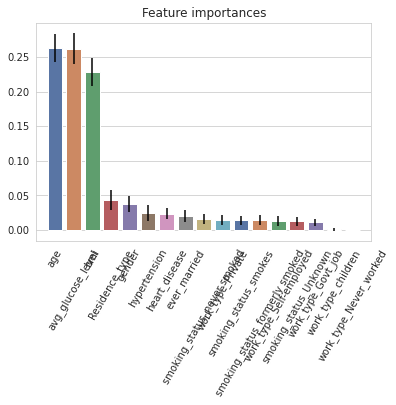

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
    
# Plot the impurity-based feature importances of the forest
plt.figure()

plt.title("Feature importances")
sns.barplot(x=np.array(features)[indices], y=importances[indices], palette="deep",yerr=std[indices])
plt.xticks(range(X.shape[1]), np.array(features)[indices],rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()